In [1]:

from data_preprocessing import data_preprocessing 
from collections import defaultdict
from heatmap import get_image_data
import json


data_path = "data/data.csv"
output_folder = "data/images"

df = data_preprocessing(data_path,output_folder)


users = df['sysId'].unique()

print("no of users are ", len(users))

sessions = df['sessionId'].unique()

print("avg sessions per  user are" ,len(sessions)/len(users))



df1 = df.drop(columns = ['_id', '__v','gazeY'])
urls = df1['url'].unique()

print(len(urls))
    
##calculating avg time for each data point

df_sub = df.loc[df['sysId'] == '89648605729908210000']

avg_time = 0
for index, row in df_sub.iterrows():
    if index == 0:
        pass
    else:
        #print(type(df_sub.iloc[index]['timestamp']))
        avg_time += (df_sub.iloc[index]['timestamp']-df_sub.iloc[index-1]['timestamp'])/len(json.loads(df_sub.iloc[index]['gazeX']))
avg_time = avg_time/(len(df_sub) - 1)

print(avg_time)





no of users are  18
avg sessions per  user are 1.5555555555555556
28
46.11220759046151


In [2]:
freqs = get_image_data(df)

times = []

<Figure size 432x288 with 0 Axes>

[(1.0, 55.38076131614427), (1.0, 60.45310415109504), (1.0, 89.04267285718117), (1.0, 92.68553725682763), (2.0, 108.73258549830824), (1.0, 109.33204419698424), (2.0, 115.55719222169654), (1.0, 120.03007635797131), (2.0, 148.71186947923837), (3.0, 149.17299155514297), (1.0, 159.35802540668615), (1.0, 165.12781538144267), (2.5, 251.91099006669123), (3.0, 259.15060665839366), (1.0, 271.969800368542), (2.0, 307.10730255247364), (3.0, 314.9694339466473), (2.0, 397.8561270905019)]


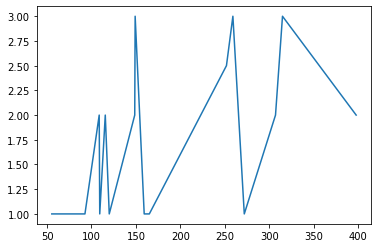

196.6149465272829
281.6034090709826


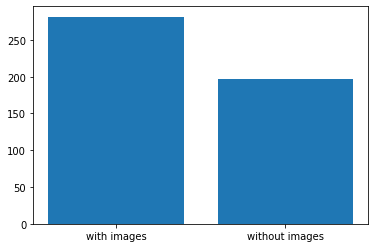

In [16]:


for index, row in df.iterrows():
    time = len(df.iloc[index]['gazeX'])*avg_time/1000
    times.append(time)

avg_nav_depth = defaultdict(lambda:0)
time_per_user = defaultdict(lambda:0)
session_users = defaultdict(lambda:0)

for user in users:
    user_values = df1.loc[df1['sysId'] == user]
    sessions = user_values['sessionId'].unique()
    for session in sessions:
        urls = user_values.loc[user_values['sessionId'] == session]
        unique_urls = urls['url'].unique()
        gaze_data = urls['gazeX']
        avg_nav_depth[user] +=len(unique_urls)
        time_per_user[user] += sum([len(json.loads(x)) for x in gaze_data])
    
    avg_nav_depth[user]/=len(sessions)
    time_per_user[user]/=len(sessions)
    time_per_user[user] *= avg_time/1000
    session_users[user] = len(sessions)


#print(avg_nav_depth)
#print(time_per_user)

depth = avg_nav_depth.values()
per_user = time_per_user.values()

combined_l = list(zip(depth, per_user))
combined_l.sort(key=lambda l : l[1])
print(combined_l)
x_l = [temp[0] for temp in combined_l]
y_l = [temp[1] for temp in combined_l]

import matplotlib.pyplot as plt
import pandas as pd

plt.plot(y_l,x_l)
plt.show()
    
time_with_pictures = 0
no_data_with_pictures = 0
time_without_pictures = 0
no_data_without_pictures = 0
for index,freq in enumerate(freqs):
    if freq ==0:
        no_data_without_pictures+=1
        time_without_pictures+=times[index]
    else:
        no_data_with_pictures+=1
        time_with_pictures+=times[index]

no_picutures = time_without_pictures/no_data_without_pictures
pictures = time_with_pictures/no_data_with_pictures
print(no_picutures)
print(pictures)
data_avg = [pictures,no_picutures]
labels = ["with images","without images"]
plt.bar(labels,data_avg)


table = pd.DataFrame()
table['user'] = avg_nav_depth.keys()
table['no of sessions'] = session_users.values()
table['average session time'] = time_per_user.values()
table['average redirects'] = avg_nav_depth.values()

table.to_excel("table.xlsx")
table.to_latex("table.tex")
